# Is FIFA Accurate: A FIFA/Soccer Machine Learning Project

## \*Work in Progress\*

In [1]:
import io
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal
from sklearn import metrics
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

![title](Title.png)
![title](Squad.jpg)
![title](Stadium.jpg)

## The Goal

The goal is to compare FIFA 19 game statistics to the real 18/19 match statistics. FIFA 19's statistics are based on the 17/18 real season, so we are going to test how well FIFA 19 can predict the outcome of the season following its release (18/19 season).

*****

## Motivation

I wanted to do a project that would directly address one of society’s biggest questions, while involving one of my biggest passions… “Are video games actually good for something”? There is a lot of controversy over the topic because one side believes that video games “rot the brain” and yield no significant benefit to the player, while the other side believes that video games can be an outlet for creativity and imagination. Our group personally believes that video games are a must in this world (being biased of course since I was born and raised with them and still continue to play them), however, my personal beliefs may not be enough to convince someone else that video games are essential to society. I don’t plan on making a radical video game hater into a video game devotee, but I do plan on chipping away at the argument, even if it is only about one aspect. 

The approach I decided to take was with sports, a common ground between some people who hate the idea of video games, and who love sports. Luckily, soccer is something that I am very passionate about, and I was able to create an idea to try and debunk the side effects of video games involving my favorite sport. I want to predict the best soccer team among the best European Leagues next season. I am going to be utilizing the player ratings from the famous EA soccer video game franchise, FIFA. The data will be collected from the 2018/2019 seasons in order to create a model to accurately predict wins, draws, and losses. These will be tallied up into potential points, and whichever team has the highest points is the league winner of next season, at least predicted through our model. Based on real life league rules a win will give a team 3 points, a draw will give a team 1 point, and a loss will give 0.

The project below will show you how to do this step by step, all links for important vernacular in the soccer industry are listed below, along with resources to help you understand things that are going on in the code that aren’t so obvious.

## Data Curation and Parsing

1. Read CSV file for the 18/19 season from the Github repository (The encoding paramter is set for some datasets because there are certain special characters that must be decoded differently from the standard method that the ```read_csv()``` function uses.)
2. Add a column to denote the winner of each game by reading the FTR (Full-Time Results) 
    + Soccer statistic syntax can be found [HERE](https://github.com/woobe/footballytics/blob/master/data/notes.txt)
    + Guide on how each of these statistics are calculated can be found [HERE](https://ihsaa-static.s3.amazonaws.com/soccer/soccerstatmanual.pdf)
3. Put home team as winner if value of FTR is "H", or away team as winner if value is "A"
4. Select only the division, home team, away team, and winner columns which will be needed later.
5. Repeat this process on all 5 dataframes for the 5 leagues.
6. Read CSV file for the FIFA19 game data. Then rename the division titles by their league.
7. Shown below is an example of what the League and FIFA data frames look like. Wherever the value "NaN" occurs in the league datasets, that implies that there was a tie between the two teams. We could replace this value with something like "Draw" or "Tie", but later on you will see why that was not done in this case. For simplicity we will be limiting the number of dataframes that we show so that you get the big picture, but if at any point you would like to see each dataframe output, you can use the ```display()``` command shown below by putting the dataframe within the paranthesis for the desired output.

In [2]:
# Step 1
ENG_DF = pd.read_csv("English.csv", encoding = "ISO-8859-1")

# Step 2/3
for i, row in ENG_DF.iterrows():
    if row['FTR'] == 'H':
        ENG_DF.at[i, 'Winner'] = row['HomeTeam']
    elif row['FTR'] == 'A':
        ENG_DF.at[i, 'Winner'] = row['AwayTeam']

# Step 4
ENG_DF = ENG_DF[['Div', 'HomeTeam', 'AwayTeam', 'Winner']]

#Step 5
FRA_DF = pd.read_csv("French.csv", encoding = "ISO-8859-1")
for i, row in FRA_DF.iterrows():
    if row['FTR'] == 'H':
        FRA_DF.at[i, 'Winner'] = row['HomeTeam']
    elif row['FTR'] == 'A':
        FRA_DF.at[i, 'Winner'] = row['AwayTeam']
FRA_DF = FRA_DF[['Div', 'HomeTeam', 'AwayTeam', 'Winner']]

GER_DF = pd.read_csv("German.csv", encoding = "ISO-8859-1")
for i, row in GER_DF.iterrows():
    if row['FTR'] == 'H':
        GER_DF.at[i, 'Winner'] = row['HomeTeam']
    elif row['FTR'] == 'A':
        GER_DF.at[i, 'Winner'] = row['AwayTeam']
GER_DF = GER_DF[['Div', 'HomeTeam', 'AwayTeam', 'Winner']]

ITA_DF = pd.read_csv("Italian.csv", encoding = "ISO-8859-1")
for i, row in ITA_DF.iterrows():
    if row['FTR'] == 'H':
        ITA_DF.at[i, 'Winner'] = row['HomeTeam']
    elif row['FTR'] == 'A':
        ITA_DF.at[i, 'Winner'] = row['AwayTeam']
ITA_DF = ITA_DF[['Div', 'HomeTeam', 'AwayTeam', 'Winner']]

SPA_DF = pd.read_csv("Spanish.csv", encoding = "ISO-8859-1")
for i, row in SPA_DF.iterrows():
    if row['FTR'] == 'H':
        SPA_DF.at[i, 'Winner'] = row['HomeTeam']
    elif row['FTR'] == 'A':
        SPA_DF.at[i, 'Winner'] = row['AwayTeam']
SPA_DF = SPA_DF[['Div', 'HomeTeam', 'AwayTeam', 'Winner']]

# Step 6
FIFA_DF = pd.read_csv("FIFA_data.csv")
FIFA_DF.drop(FIFA_DF.columns[[0, 6, 8, 9]], axis = 1, inplace = True)

# Step 7
display(ENG_DF)
display(FIFA_DF)

,Div,HomeTeam,AwayTeam,Winner
0,E0,Manchester United,Leicester City,Manchester United
1,E0,Bournemouth,Cardiff City,Bournemouth
2,E0,Fulham,Crystal Palace,Crystal Palace
3,E0,Huddersfield Town,Chelsea,Chelsea
4,E0,Newcastle United,Tottenham Hotspur,Tottenham Hotspur
...,...,...,...,...
375,E0,Liverpool,Wolverhampton Wanderers,Liverpool
376,E0,Manchester United,Cardiff City,Cardiff City
377,E0,Southampton,Huddersfield Town,NaN
378,E0,Tottenham Hotspur,Everton,NaN


,ID,Name,Age,Nationality,Overall,Club
0,158023,L. Messi,31,Argentina,94,FC Barcelona
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain
3,193080,De Gea,27,Spain,91,Manchester United
4,192985,K. De Bruyne,27,Belgium,91,Manchester City
...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,Crewe Alexandra
18203,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF
18204,241638,B. Worman,16,England,47,Cambridge United
18205,246268,D. Walker-Rice,17,England,47,Tranmere Rovers


## Data Management and Data Cleaning

1. Combine all of the previously created csv files to have a full 18/19 season containing the 5 leagues. (This can only be done since all of the columns of each of the consituent dataframes have the same columns). 
2. Go through matches and count the number of wins for each club. Going back to Step 7 of Data Curation and Parsing, if there was a value "Draw" in the table, then in our column "Club" there would be an entity named "Draw" and the number of wins would be how many draws occurred across every league. This is because ```value_counts()``` counts the number of wins for each team by counting the number of times each individual entity appears, and "Draw" would equate to a club name here.
3. Each league has their own specific number of games played per season. Count the number of games played by each club. For this certain dataset, we know that only the Bundesliga has 18 teams compared to the other leagues' 20, so each team in the bundesliga plays 17 home games and 17 away games, playing every other team twice. In the other leagues they each play 19 home and away games following the same rules respectively. If you were dealing with an even larger dataset where you weren't aware of how many teams/games were present, then you would need to write some code to sum it up. We'll leave figuring out some of that stuff up to you! The games played and wins DataFrames get merged and this can be done because there is a common column so we don't have to specify the method of subset joining.
    + More information about games per season can be found [HERE](https://entertainment.howstuffworks.com/soccer.htm) and [HERE](http://dearsportsfan.com/2015/02/19/european-club-soccer-work/)
4. Obtain Draws and Losses of teams through other data set and by subtracting from Wins/Games Played.
5. Go through FIFA dataframe to find the average rating of each club by taking the mean of the overall rating of each player for each club.
    + Information on how FIFA obtains their ratings can be found [HERE](https://www.goal.com/en-ae/news/fifa-player-ratings-explained-how-are-the-card-number-stats/1hszd2fgr7wgf1n2b2yjdpgynu)
6. Make a new dataframe containing all important attributes.
7. Create a new dataframe containing each player's individual ratings, their club's winning percentage, the player's wage, age, and value.

In [3]:
# Step 1
SZN_DF = pd.concat([ENG_DF, FRA_DF, GER_DF, ITA_DF, SPA_DF], ignore_index=True)
SZN_DF['Div'] = ["Premier League" if row['Div'] == "E0" else row['Div'] for index, row in SZN_DF.iterrows()]
SZN_DF['Div'] = ["Bundesliga" if row['Div'] == "D1" else row['Div'] for index, row in SZN_DF.iterrows()]
SZN_DF['Div'] = ["Ligue 1" if row['Div'] == "F1" else row['Div'] for index, row in SZN_DF.iterrows()]
SZN_DF['Div'] = ["Serie A" if row['Div'] == "I1" else row['Div'] for index, row in SZN_DF.iterrows()]
SZN_DF['Div'] = ["La Liga" if row['Div'] == "SP1" else row['Div'] for index, row in SZN_DF.iterrows()]
SZN_DF.rename(columns = {'Div': 'League', 'Winner': 'Club'}, inplace = True)

# Step 2
win_perc = SZN_DF['Club'].value_counts().rename_axis('Club').reset_index(name = 'Wins')
win_perc['Draws'] = 0
win_perc['Losses'] = 0
win_perc = pd.merge(win_perc, SZN_DF[['Club', 'League']])
win_perc = win_perc.drop_duplicates().reset_index(drop = True) 

# Step 3
games = SZN_DF['HomeTeam'].value_counts().rename_axis('Club').reset_index(name = 'Games Played')
for i, row in games.iterrows():
     games.at[i, 'Games Played'] *= 2
win_perc['Draws'] = 0
win_perc['Losses'] = 0
win_perc['Points'] = 0 
win_perc = pd.merge(win_perc, games)
win_perc = win_perc.sort_values(by = ['Games Played', 'Wins'], ascending = False)

# Step 4
for i, row in SZN_DF.iterrows():
    if pd.isnull(row['Club']):
        win_perc.loc[win_perc['Club'] == row['HomeTeam'], 'Draws'] += 1 
        win_perc.loc[win_perc['Club'] == row['AwayTeam'], 'Draws'] += 1
        hgp = win_perc.loc[win_perc['Club'] == row['HomeTeam'], 'Games Played']  
        hw = win_perc.loc[win_perc['Club'] == row['HomeTeam'], 'Wins'] 
        hd = win_perc.loc[win_perc['Club'] == row['HomeTeam'], 'Draws'] 
        agp = win_perc.loc[win_perc['Club'] == row['AwayTeam'], 'Games Played']  
        aw = win_perc.loc[win_perc['Club'] == row['AwayTeam'], 'Wins'] 
        ad = win_perc.loc[win_perc['Club'] == row['AwayTeam'], 'Draws'] 
        win_perc.loc[win_perc['Club'] == row['HomeTeam'], 'Losses'] = hgp - hw - hd 
        win_perc.loc[win_perc['Club'] == row['AwayTeam'], 'Losses'] = agp -aw - ad
        win_perc.loc[win_perc['Club'] == row['HomeTeam'], 'Points'] = 3*hw + hd 
        win_perc.loc[win_perc['Club'] == row['AwayTeam'], 'Points'] = 3*aw + ad

# Step 5
team_ratings = FIFA_DF.groupby('Club', as_index = False)['Overall'].mean().sort_values('Overall', ascending = False)

# Step 6
win_perc.at[45, 'Club'] = "Real Sociedad"
win_perc.at[62, 'Club'] = "SPAL"
win_perc.at[84, 'Club'] = "FC Schalke 04"
club_df = pd.merge(win_perc, team_ratings, on = 'Club')
club_df = club_df.sort_values(['Overall', 'Wins'], ascending = False).reset_index(drop = True)
club_df = club_df[['League', 'Club', 'Overall', 'Games Played', 'Wins', 'Draws', 'Losses', 'Points']]
display(club_df)

# Step 7
#FIFA_DF[['Wage']] = FIFA_DF[['Wage']].replace('[\€(M|K)]', '', regex = True).astype(float)
FIFA_DF = pd.merge(FIFA_DF, club_df[['Club', 'League']], how = 'left', on = 'Club')
FIFA_DF = FIFA_DF.dropna().reset_index(drop = True)
FIFA_DF = FIFA_DF[['ID', 'League', 'Club', 'Name', 'Age', 'Nationality', 'Overall']]
display(FIFA_DF)

,League,Club,Overall,Games Played,Wins,Draws,Losses,Points
0,Serie A,Juventus,82.280000,38,28,6,4,90
1,Serie A,Napoli,80.000000,38,24,7,7,79
2,Serie A,Inter,79.750000,38,20,9,9,69
3,La Liga,Real Madrid,78.242424,38,21,5,12,68
4,Serie A,Milan,78.074074,38,19,11,8,68
...,...,...,...,...,...,...,...,...
90,Bundesliga,Fortuna Düsseldorf,68.424242,34,13,5,16,44
91,Serie A,Empoli,68.333333,38,10,8,20,38
92,Ligue 1,Nîmes Olympique,68.259259,38,15,8,15,53
93,Premier League,Cardiff City,68.181818,38,10,4,24,34


,ID,League,Club,Name,Age,Nationality,Overall
0,158023,La Liga,FC Barcelona,L. Messi,31,Argentina,94
1,20801,Serie A,Juventus,Cristiano Ronaldo,33,Portugal,94
2,190871,Ligue 1,Paris Saint-Germain,Neymar Jr,26,Brazil,92
3,193080,Premier League,Manchester United,De Gea,27,Spain,91
4,192985,Premier League,Manchester City,K. De Bruyne,27,Belgium,91
...,...,...,...,...,...,...,...
2832,242541,Premier League,Cardiff City,C. Brown,20,England,52
2833,240565,Serie A,Empoli,G. Meli,19,Italy,52
2834,237127,Premier League,SPAL,D. Thiam,20,Senegal,51
2835,234705,Premier League,Watford,A. Eleftheriou,20,England,51


## Exploratory Data Analysis 

During exploratory data analysis we begin to visualize our previously cleaned data to see if there are any interesting correlations that we can draw.

Let’s make one plot for each of the 5 leagues we are looking at.

#### Each plot has the corresponding club teams on the x axis and the club’s corresponding player ratings on the y axis. The plots use a violin distribution to see the distribution of the team’s player ratings

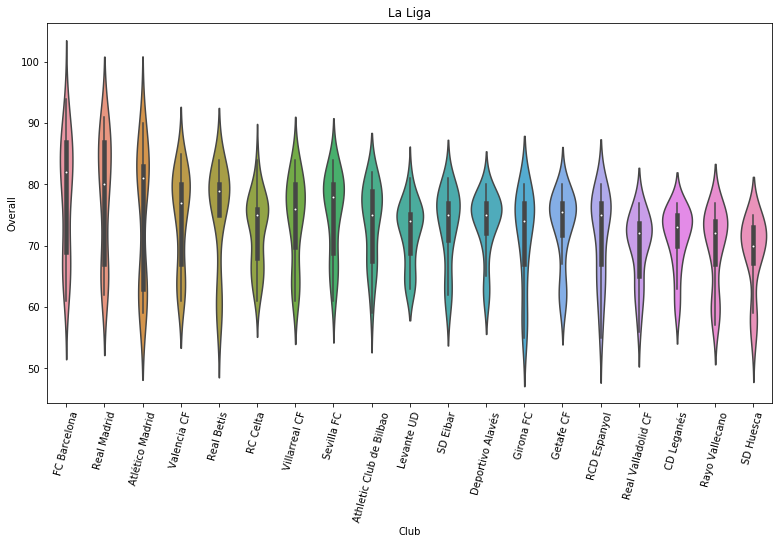

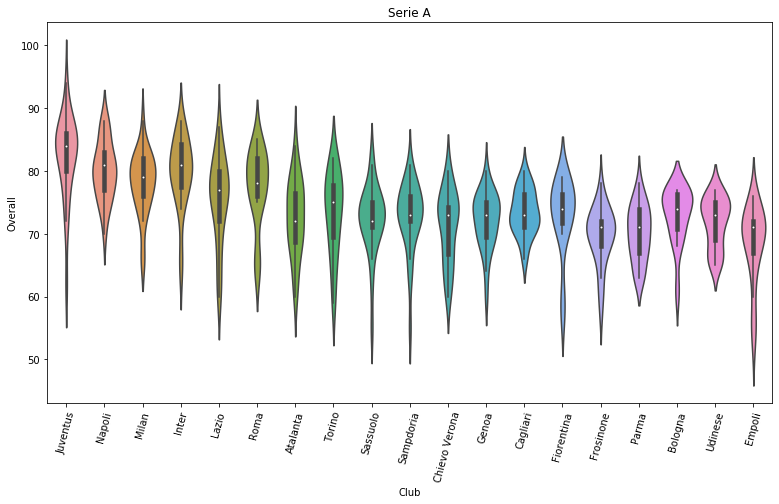

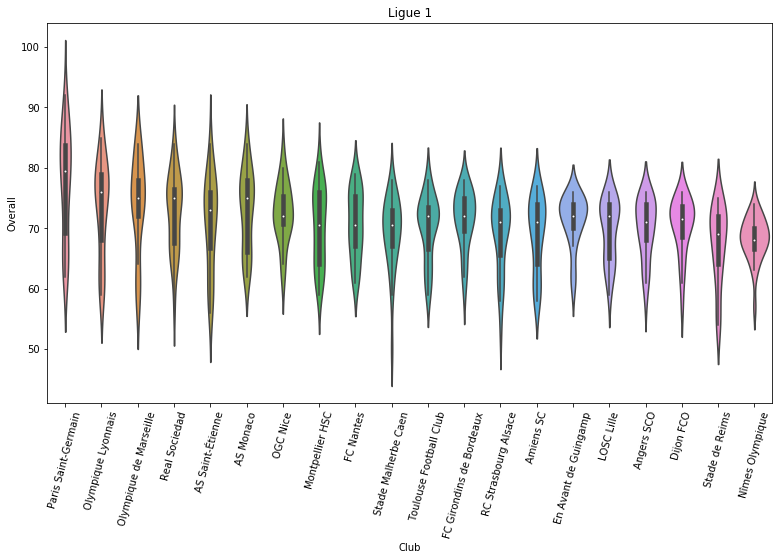

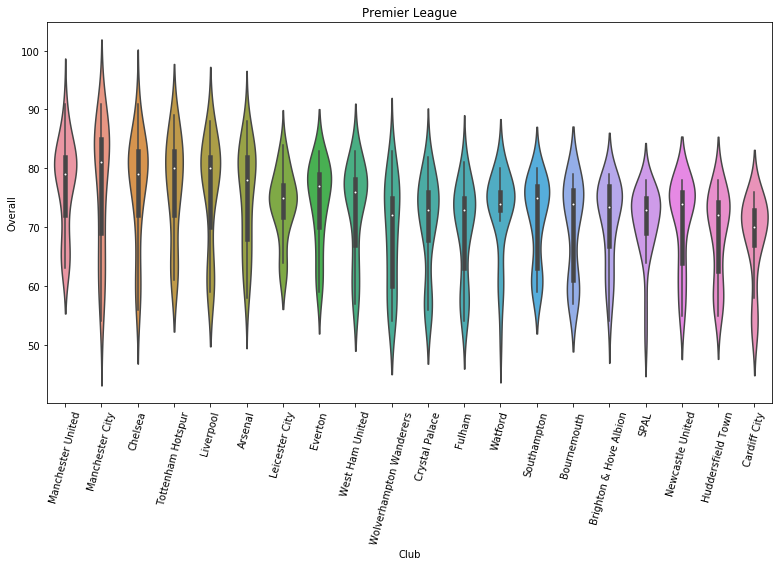

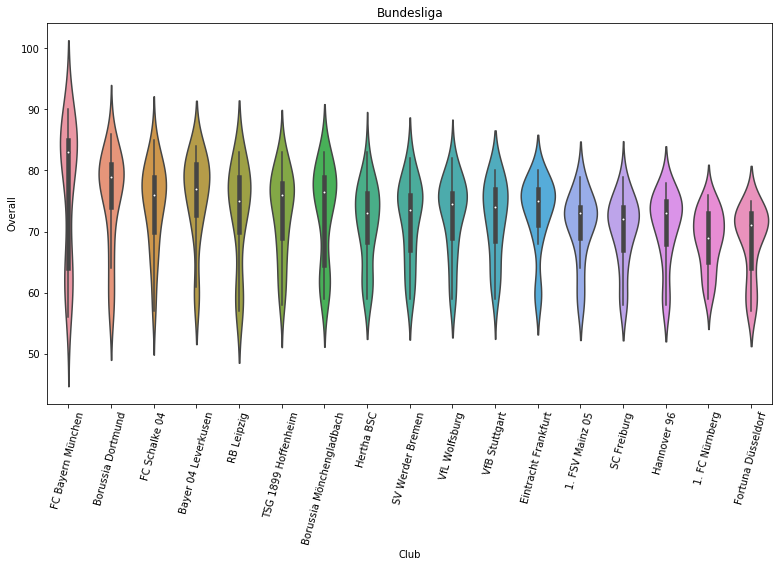

In [4]:
for league in FIFA_DF.League.unique():
    fig, ax = plt.subplots(figsize = (13, 7))
    chart = sns.violinplot(x = 'Club', y = 'Overall', data = FIFA_DF[FIFA_DF['League'] == league], ax = ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)
    chart.set_title(league)
    print("\n")
    plt.show()

#### We can also make a plot to see the overall player rating distribution for each league, we can first make a histogram.

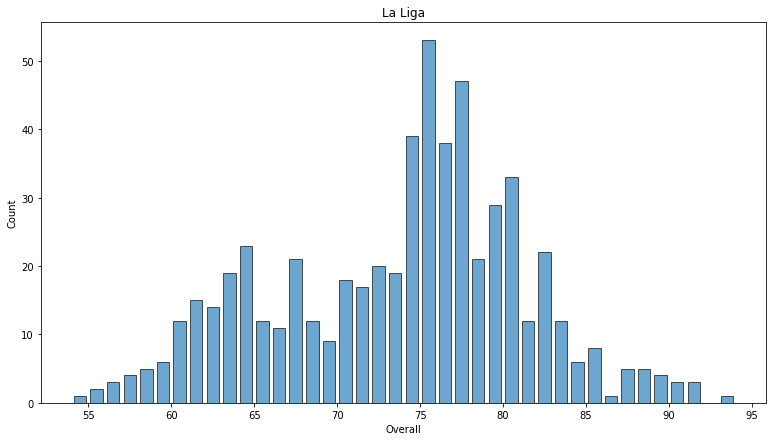

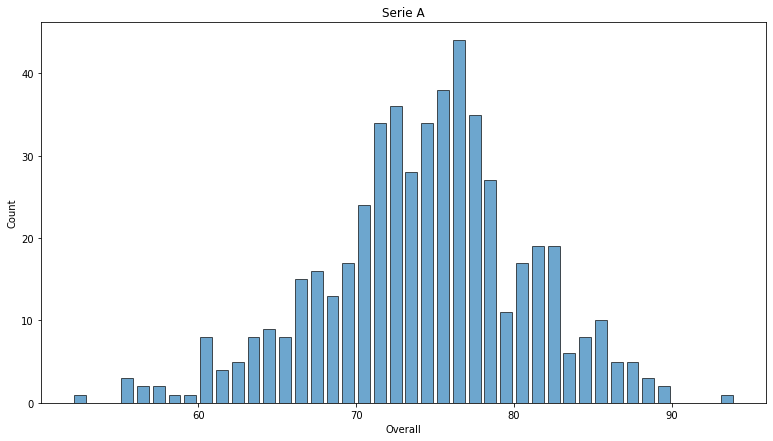

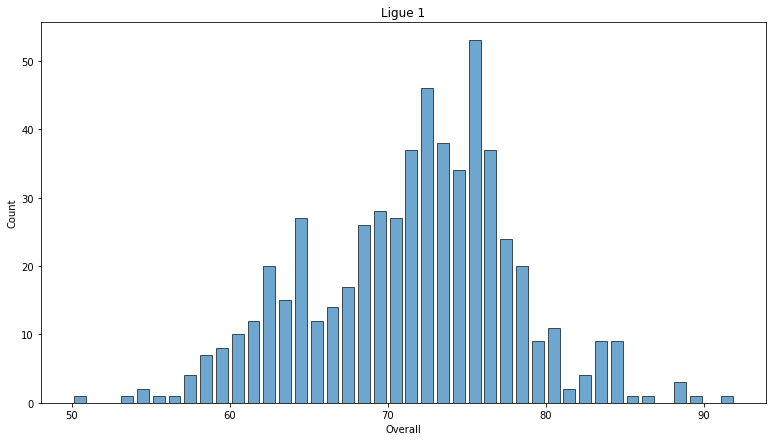

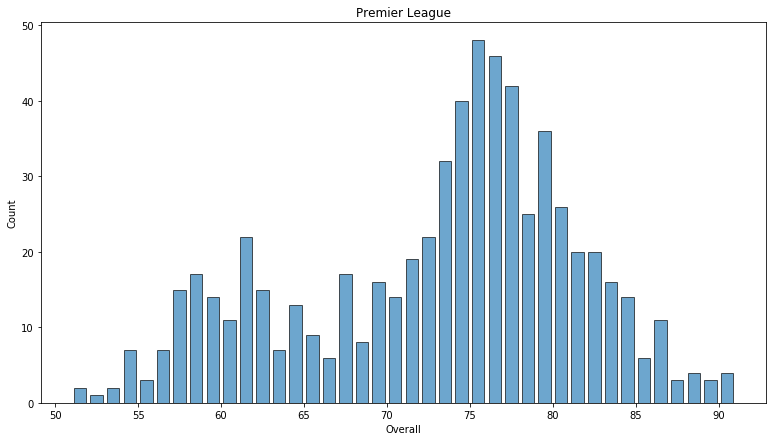

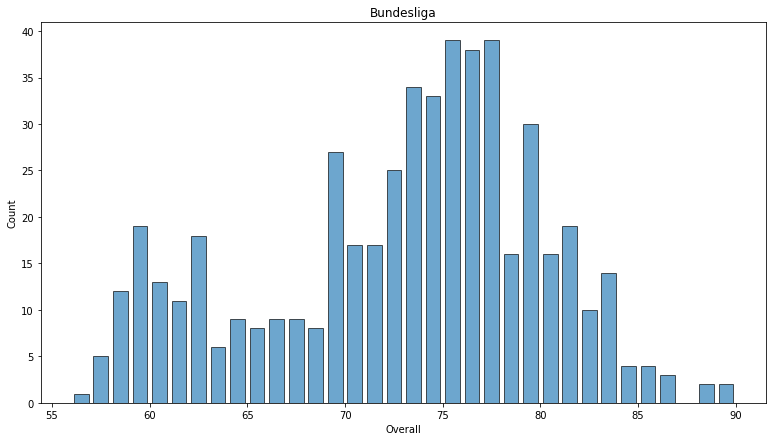

In [5]:
for league in FIFA_DF.League.unique():
    x = list(FIFA_DF[FIFA_DF['League'] == league]['Overall'])
    fig, ax = plt.subplots(figsize = (13, 7))
    sns.distplot(x, bins = max(x) - min(x), hist_kws={"rwidth":0.75, 'edgecolor':'black', 'alpha':0.65}, kde = False)
    plt.ylabel('Count')
    plt.xlabel('Overall')
    plt.title(league)
    print("\n")
    plt.show()

#### We can also make a plot of all the densities on top of each other so that we can compare how each league's players and their ratings are distributed. Each league has relatively the same distribution when it comes to their player ratings. 

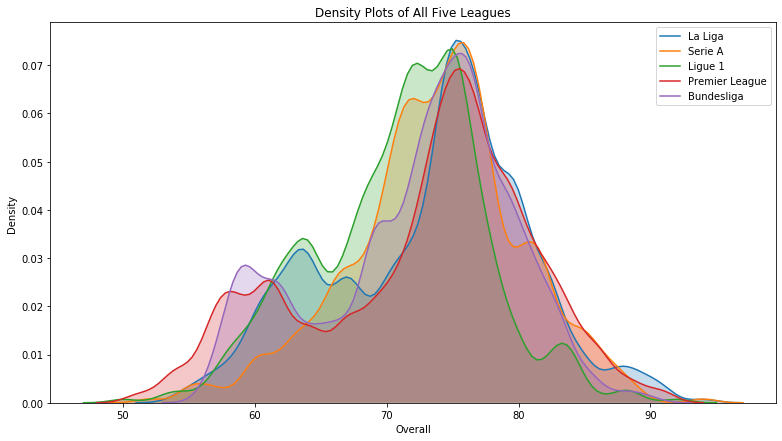

In [6]:
fig, ax = plt.subplots(figsize = (13, 7))
for league in FIFA_DF.League.unique():
    x = list(FIFA_DF[FIFA_DF['League'] == league]['Overall'])
    sns.kdeplot(x, bw = 1, shade = True, label = league)
    plt.ylabel('Density')
    plt.xlabel('Overall')
    plt.title('Density Plots of All Five Leagues') 
plt.show()

#### We can also make a plot comparing the average overall rating of a team to how many points they had this season. Here we see a relatively linear trend with somewhat of a positive correlation.

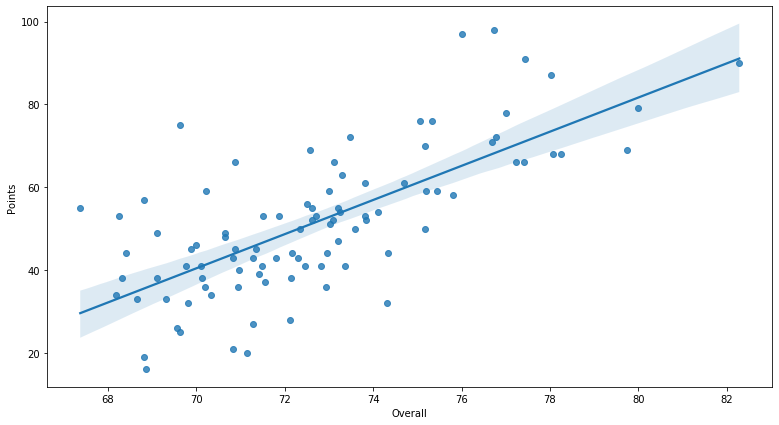

In [7]:
fig, ax = plt.subplots(figsize = (13, 7))
sns.regplot(club_df['Overall'], club_df['Points'])

## Machine Learning

Now comes the most interesting part, where we analyze all the data and predict the stats of each team.

array([[78.24242424, 38.        ],
       [75.2       , 38.        ],
       [73.        , 38.        ],
       [77.24242424, 38.        ],
       [69.10344828, 38.        ],
       [77.43333333, 38.        ],
       [71.14285714, 38.        ],
       [73.09375   , 38.        ],
       [69.32142857, 38.        ],
       [71.51724138, 38.        ],
       [67.37931034, 38.        ],
       [71.8       , 38.        ],
       [72.625     , 34.        ],
       [72.15625   , 38.        ],
       [70.9375    , 38.        ],
       [72.5       , 38.        ],
       [70.87878788, 38.        ],
       [71.28      , 38.        ],
       [68.18181818, 38.        ],
       [70.10344828, 38.        ],
       [72.83333333, 38.        ],
       [71.42424242, 38.        ],
       [72.34482759, 38.        ],
       [68.81818182, 38.        ],
       [71.48387097, 38.        ],
       [73.24242424, 34.        ],
       [68.66666667, 38.        ],
       [71.36363636, 38.        ],
       [70.96296296,

[[21  5 12]
 [17  8 13]
 [15 14  9]
 [19  9 10]
 [ 9 11 18]
 [29  4  5]
 [ 2 14 22]
 [15  7 16]
 [ 7 12 19]
 [14 11 13]
 [13 16  9]
 [11 10 17]
 [16  7 11]
 [11 11 16]
 [ 9  9 20]
 [15 11 12]
 [12  9 17]
 [ 5 12 21]
 [10  4 24]
 [10 11 17]
 [ 8 17 13]
 [ 9 12 17]
 [14  8 16]
 [16  9 13]
 [10 11 17]
 [15  9 10]
 [ 7 12 19]
 [11 12 15]
 [11  7 20]
 [22  9  7]
 [13 12  9]
 [21  9  8]
 [24  7  7]
 [ 7  7 20]
 [15 16  7]
 [20  9  9]
 [ 8  8 18]
 [ 3 10 21]
 [ 8 14 16]
 [ 3  7 28]
 [ 7  5 26]
 [22 10  6]
 [11 10 13]
 [ 9  7 22]
 [18  4 12]
 [15  8 15]
 [ 8 14 16]]
[[70.82758621 34.        ]
 [74.34375    38.        ]
 [70.21428571 38.        ]
 [70.2        34.        ]
 [82.28       38.        ]
 [73.82758621 38.        ]
 [72.93939394 38.        ]
 [72.7037037  38.        ]
 [76.78787879 38.        ]
 [72.58333333 38.        ]
 [69.10714286 38.        ]
 [71.55172414 38.        ]
 [69.63636364 38.        ]
 [72.45454545 38.        ]
 [76.6969697  38.        ]
 [78.07407407 38.        ]
 [7

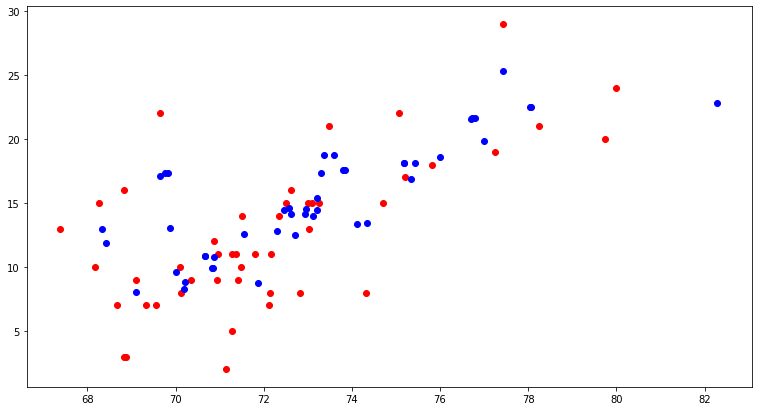

In [10]:
fig, ax = plt.subplots(figsize = (13, 7))
X = club_df.iloc[:, 2:4].values
y = club_df.iloc[:, 4:7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)
regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
display(X_train)
print(y_train)
print(X_test)
print(y_pred)
train_in = pd.DataFrame(X_train, columns=['Overall', 'Games Played'])
train_out = pd.DataFrame(y_train, columns=['Wins', 'Draws', 'Losses'])
input = pd.DataFrame(X_test, columns=['Overall', 'Games Played'])
output = pd.DataFrame(y_pred, columns=['Wins', 'Draws', 'Losses'])
plt.scatter(train_in['Overall'], train_out['Wins'], color = 'red')
plt.scatter(input['Overall'], output['Wins'], color = 'blue')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))